In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import csv

In [38]:
#read file
data = np.genfromtxt ('1216_ecg_data.csv', delimiter=',', dtype=np.float64)

[222, 445, 775, 944, 1002, 1058, 1115, 1172, 1394, 1450, 1506, 1563, 1737, 1795, 1853, 1910, 1967, 2024, 2080, 2137, 2194, 2253, 2312, 2370, 2428, 2486, 2541, 2596, 2651, 2706, 2761, 2817, 2871, 2927]


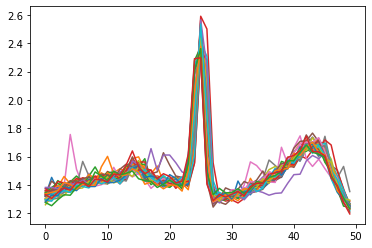

In [39]:
#test for one row
i = 0
current_data = data[i, :data.shape[1] - 1]
        
label = int(data[i, -1])
peaks, _ = find_peaks(current_data, height=1.8)

#find peak by average mid 1/3 difference of the sorted duration
duration = []
for j in range(len(peaks) - 1):
    duration.append(peaks[j + 1] - peaks[j])

sort_duration = np.sort(duration)
#print(sort_duration)
period = int(np.mean(sort_duration[len(peaks)//3 : 2 * len(peaks) // 3]))

#find the offset of the signal

good_peaks = []
threshold = 10
for j in range(len(peaks) - 2):
    if np.abs((peaks[j + 1] - peaks[j]) - period) < threshold and np.abs((peaks[j + 2] - peaks[j + 1]) - period) < threshold:
        good_peaks.append(peaks[j + 1])

print(good_peaks)

ecg = []

for j in range(len(good_peaks)):
    if good_peaks[j] - period//2 < 0 or good_peaks[j] + period //2 >= data.shape[1]:
        continue

    temp = []
    for k in current_data[good_peaks[j] - period//2: good_peaks[j] + period//2]:
        temp.append(k)
    ecg.append(temp)

for i in range(len(ecg)):
    plt.plot(ecg[i])

In [40]:
filename = "data_preprocessing.csv"
with open(filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile) 
    for i in range(data.shape[0]):
        current_data = data[i, :data.shape[1] - 1]
        
        label = int(data[i, -1])
        peaks, _ = find_peaks(current_data, height=1.8)

        #find peak by average mid 1/3 difference of the sorted duration
        duration = []
        for j in range(len(peaks) - 1):
            duration.append(peaks[j + 1] - peaks[j])

        sort_duration = np.sort(duration)
        #print(sort_duration)
        period = int(np.mean(sort_duration[len(peaks)//3 : 2 * len(peaks) // 3]))

        #find the offset of the signal
        #find the offset of the signal

        good_peaks = []
        threshold = 10
        for j in range(len(peaks) - 2):
            if np.abs((peaks[j + 1] - peaks[j]) - period) < threshold and np.abs((peaks[j + 2] - peaks[j + 1]) - period) < threshold:
                good_peaks.append(peaks[j + 1])

        ecg = []

        for j in range(len(good_peaks)):
            if good_peaks[j] - period//2 < 0 or good_peaks[j] + period //2 >= data.shape[1]:
                continue

            temp = []
            for k in current_data[good_peaks[j] - period//2: good_peaks[j] + period//2]:
                temp.append(k)
            ecg.append(temp)

        for j in range(len(ecg)):
            len_ecgj = len(ecg[j])
            for k in range(186 - len_ecgj):
                ecg[j] = np.append(ecg[j], [0])
            ecg[j] = np.append(ecg[j], [label])
            csvwriter.writerow(ecg[j])